# Financial risk modeling using Quandl datasets


*We are assuming the data has been seeded using fetch.ipynb.
Once the data is loaded, we can fetch ticker data using the data service:*


In [36]:
import requests
import json

# This is the url to which the query is made
url = "http://data.hasura/v1/query"

# This is the json payload for the query
requestPayload = {
    "type": "select",
    "args": {
        "table": "wiki_prices",
        "columns": [
            "ticker",
            "date",
            "close",
            "adj_close"
        ],
        "where": {
            "ticker": {
                "$eq": "A"
            }
        }
    }
}

# Setting headers
headers = {
    "Content-Type": "application/json",
    "X-Hasura-Role": "admin"
}

# Make the query and store response in resp
resp = requests.request("POST", url, data=json.dumps(requestPayload), headers=headers)
tickerData = json.loads(resp.content)
print(tickerData[0])


*We set few parameters for data visualisation:*


In [38]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
seaborn.mpl.rcParams['savefig.dpi'] = 90


*Next, we import pandas and load the JSON data fetched above and plot the price curve:*


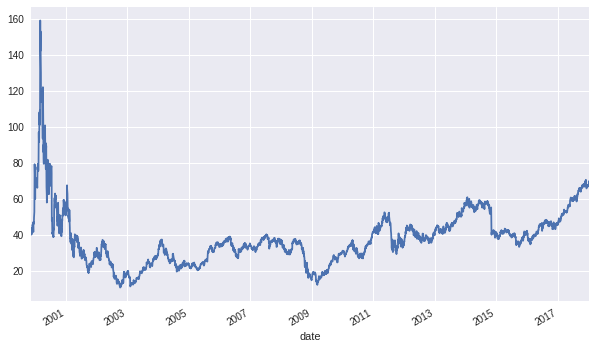

In [40]:
import pandas as pd

df = pd.DataFrame(tickerData)
df.index = pd.to_datetime(df['date'])

prices = df['close']
prices.plot()



*For our financial model (based on GARCH), we will need the percentage change in prices of the above ticker:*
    

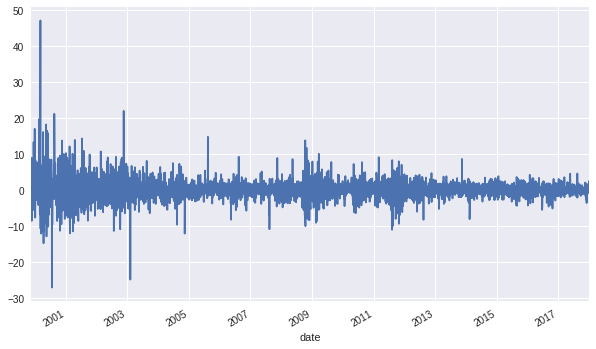

In [41]:

returns = 100*df['adj_close'].pct_change().dropna()
returns.plot()



*We fit a simple GARCH model with constant mean i.e. GARCH(1,1)* [Read more]( https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)


Iteration:      5,   Func. Count:     36,   Neg. LLF: 10063.189050563311
Iteration:     10,   Func. Count:     75,   Neg. LLF: 10058.493787265423
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 10058.42571281857
            Iterations: 13
            Function evaluations: 93
            Gradient evaluations: 13


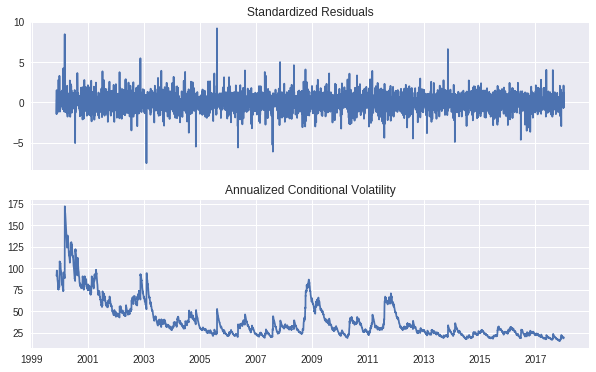

In [46]:
from arch import arch_model

am = arch_model(returns)
res = am.fit(update_freq=5)
fig = res.plot(annualize='D')
